# a

In [0]:
pip install gwpy Pillow

     |████████████████████████████████| 1.3MB 2.9MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 2.3MB 42.9MB/s 
  Created wheel for ligo-segments: filename=ligo_segments-1.2.0-cp36-cp36m-linux_x86_64.whl size=83617 sha256=3868a26bab90cec3a43aee0434554cf19abc19123080315954ece4ffc5f4aadb
  Stored in directory: /root/.cache/pip/wheels/5d/1e/4a/ab4122baed7d67f6abce65b2b12049d3bc7fe5dad24edf89df
Successfully built ligo-segments


In [0]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.image as mpimg
import matplotlib as mlp

import numpy as np

from gwpy.timeseries import TimeSeries
from gwpy.signal import filter_design
from gwpy.segments import DataQualityFlag
from gwpy.plot import Plot
from gwpy.segments import Segment

import torch
import torch.nn as nn
from torch.autograd import Variable
import pandas as pd
import torchvision
import torchvision.transforms as transforms

import PIL
from numpy import asarray
from PIL import Image
from matplotlib import pyplot
import matplotlib.image as mpimg

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ls 'gdrive/My Drive/GW data/Sdata'

0.png    1.png   30.png  41.png  52.png  63.png  74.png  85.png  96.png
100.png  20.png  31.png  42.png  53.png  64.png  75.png  86.png  97.png
10.png   21.png  32.png  43.png  54.png  65.png  76.png  87.png  98.png
11.png   22.png  33.png  44.png  55.png  66.png  77.png  88.png  99.png
12.png   23.png  34.png  45.png  56.png  67.png  78.png  89.png  9.png
13.png   24.png  35.png  46.png  57.png  68.png  79.png  8.png   labels.csv
14.png   25.png  36.png  47.png  58.png  69.png  7.png   90.png
15.png   26.png  37.png  48.png  59.png  6.png   80.png  91.png
16.png   27.png  38.png  49.png  5.png   70.png  81.png  92.png
17.png   28.png  39.png  4.png   60.png  71.png  82.png  93.png
18.png   29.png  3.png   50.png  61.png  72.png  83.png  94.png
19.png   2.png   40.png  51.png  62.png  73.png  84.png  95.png


In [0]:
def specgram(qspecgram):
  plot = qspecgram.plot(figsize=[15,5])
  ax = plot.gca()
  ax.set_ylim(20, 600)
  plt.show()
  return plot

In [0]:
from gwpy.timeseries import TimeSeries
timeline=np.arange(1126257950, 1126260786,.5)
print(len(timeline))

In [0]:
na=[str(a) for a in np.arange(0,11,1)]
for i in range(len(timeline)):
  data = TimeSeries.fetch_open_data('H1', timeline[i], timeline[i+40])
  qspecgram = data.q_transform(outseg=(timeline[i], timeline[i+1]))
  print(timeline[i],timeline[i+1])
  c=specgram(qspecgram)
  loc='gdrive/My Drive/GW data/'+na[i]+'.png'
  c.savefig(loc, dpi=1800)

In [0]:
# load image
na=[str(a) for a in range(64100)]
data=np.zeros((234,410,2600), dtype=np.float32)

In [0]:
for i in np.arange(233):
  loc='/content/gdrive/My Drive/GW DATA/'+na[i]+'.png'
  image = Image.open(loc)
  # create a cropped image
  cropped = image.crop((550, 390, 3150, 800))
  gs_image = cropped.convert(mode='L')
  k=asarray(gs_image)
  data[i]=k
  #print(k,np.min(k),np.max(k))
  #print(k.shape,k.size)
  pyplot.imshow(k)
  pyplot.show()

In [0]:
na=[str(a) for a in range(64100)]
for i in range(102):
  loc='/content/gdrive/My Drive/GW data/Sdata/'+na[i]+'.png'
  image = Image.open(loc)
  cropped = image.crop((1080, 300, 9000, 2650))
  pyplot.grid(0)
  pyplot.axis('off')
  pyplot.imshow(cropped)
  loc='gdrive/My Drive/GW data/'+na[i]+'.png'
  #pyplot.savefig(loc, dpi=1800)

[255 255 255 ... 255 255 255] (2320, 7030)


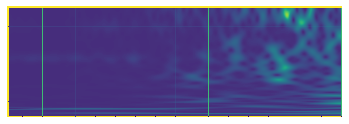

In [0]:
loc='/content/gdrive/My Drive/GW data/Sdata/8.png'
image = Image.open(loc)
cropped = image.crop((1080, 320, 8110, 2640))
gs_image = cropped.convert(mode='L')
k=asarray(gs_image)
print(k[1],k.shape)
pyplot.grid(0)
pyplot.axis('off')
pyplot.imshow(gs_image)
#loc='gdrive/My Drive/GW data/12.png'
#plt.savefig(loc, dpi=1200)

In [0]:
from PIL import Image
loc='/content/gdrive/My Drive/GW data/Sdata/0.png'
image = Image.open(loc)
print(image.size)

(9000, 3000)


In [0]:
((3200, 910, 24500, 8000)) when dpi=1800
((1060, 300, 8110, 2650)) when dpi = 800


In [0]:
data=np.zeros((10, 2320, 7030), dtype=np.float32)
data[1].shape

(2320, 7030)

# collecting data

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ...

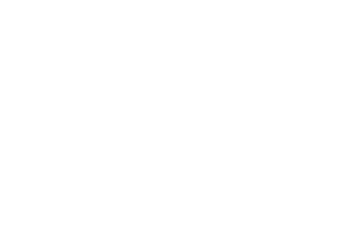

In [0]:
data=np.zeros((10, 2000, 2000), dtype=np.float32)
#11600 in z dir
#7030 in y 4 along x

na=[str(a) for a in range(101)]
for i in range(10):
  loc='/content/gdrive/My Drive/GW data/Sdata/'+na[i]+'.png'
  image = Image.open(loc)
  cropped = image.crop((1080, 320, 8110, 2640))
  gs_image = cropped.convert(mode='L')
  img = gs_image.resize((2000,2000))
  pyplot.grid(0)
  pyplot.axis('off')
  #pyplot.imshow(img)
  #pyplot.show()
  data[i]=asarray(img)/255
  print(data[i])

In [0]:
print(data.shape)

(10, 2000, 2000)


In [0]:
plt.imshow=(data[1])
plt.show()

In [0]:
len(data)

10

In [0]:
train_loader=torch.utils.data.DataLoader(data,batch_size=2)

In [0]:
batch=next(iter(train_loader))
print(len(batch),type(batch))
image=batch[0]

2 <class 'torch.Tensor'>


In [0]:
image.shape

torch.Size([2000, 2000])

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
d=torchvision.utils.make_grid(image,nrow=10)# number of images in a row by use of 
                                                # image-> image tensor nrow->number of images in a row 
                                              # iamges in a grid obtained by torchvsion.make_grid
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

NameError: ignored

<Figure size 1080x1080 with 0 Axes>

In [0]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)# in channel 1 means 1 color input with 6 channels of filter used to produce output of size 5x5
        #single argumet of kernel size implies only sqaure filters 
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)# input for one layer is ouput for another layer
        #when moving from conv layer to linear layer flatteneing is required
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)# out_features represents the no. of trining classes
        
    def forward(self, t):
        # 1st layer
        t=t #f(x)=x
        
        #2nd hidden layer
        
        t=self.conv1(t)#weights fucntion
        t=F.relu(t)# activation function not layers as they donot have any weights attached
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        
        #3rd hidden layer
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        
        #since  4th layer is the first linear layer thus reshaping is required
        #hidden 4th layer
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=F.relu(t)
        #12 is coming from the previous output channels
        #hidden 5th layer

        t=self.fc2(t)
        t=F.relu(t)        
        #4*4 is the height and width of the same
           
        # 6th output layer
        t=self.out(t)
        #t=F.softmax(t,dim=1) #always gives a positive probabiliy of the prediction

        
        return t

In [0]:
network=Network()
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [0]:
sample=next(iter(data))
image=sample
image.shape

(2000, 2000)

In [0]:
import torch.optim as optim
network = Network()

train_loader = torch.utils.data.DataLoader(data, batch_size=2)# dataset loaded with a proper batch size
optimizer = optim.Adam(network.parameters(), lr=0.001)#pass parameters of the image and learning rate .01 Adam and other can be used



# running many epoch
for epoch in range(10):
  # for many batch
  total_loss=0
  total_correct=0
  # THIS HAPPENED FOR SINGLE BATCH SET
  for batch in train_loader:
  #batch = next(iter(train_loader)) # Get Batch  # for single batch
    images, labels = batch#unpack it for assigning

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    optimizer.zero_grad()# so that it does not accumulates gradient
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss+=loss.item()
    total_correct+=get_num(pred,label)

  print("epoch :",epoch,"total_correct :",total_correct,"loss :",total_loss)

## data array and shape

In [0]:
for i in range(100):
  print(data[i])
print(data.shape)

## converting array back to image

In [0]:
for i in range(100):
  img = PIL.Image.fromarray(data[i])
  pyplot.imshow(img)
  pyplot.axis('off')
  pyplot.grid(0)

# Object labelling

In [0]:
csvloc='/content/gdrive/My Drive/GW DATA/Sdata/labels.csv'

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving labels.csv to labels.csv
User uploaded file "labels.csv" with length 119 bytes


In [0]:
t=pd.read_csv('labels.csv')
print(t.head(),'\n\n',t.tail())

    m1   m2    e
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
4  0.0  0.0  0.0 

      m1    m2    e
5  20.1  31.1  1.2
6  21.1  32.1  2.2
7  22.1  33.1  3.2
8  23.1  34.1  4.2
9  24.1  35.1  5.2


In [0]:
t.columns 

Index(['m1', 'm2', 'e'], dtype='object')

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [0]:
data=np.zeros((10, 2000, 2000), dtype=np.float32)
#11600 in z dir
#7030 in y 4 along x

na=[str(a) for a in range(101)]
for i in range(10):
  loc='/content/gdrive/My Drive/GW data/Sdata/'+na[i]+'.png'
  image = Image.open(loc)
  cropped = image.crop((1080, 320, 8110, 2640))
  gs_image = cropped.convert(mode='L')
  img = gs_image.resize((2000,2000))
  pyplot.grid(0)
  pyplot.axis('off')
  pyplot.imshow(img)
  pyplot.show()
  k=asarray(img)
  print(k/255)
  data[i]=k/255

TypeError: ignored